In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle
import graphviz
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


%matplotlib inline

In [2]:
ping_df = pd.read_csv('ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)
df.head(10)

,Forward Packets,Forward Bytes,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Reverse Packets,Reverse Bytes,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second,Traffic Type
0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,ping
1,1,98,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,ping
2,1,98,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,ping
3,2,196,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,ping
4,2,196,1,98,1.0,1.0,98.0,98.0,1.0,98.0,1.0,98.0,1.0,0.500000,98.0,49.000000,ping
5,3,294,1,98,1.0,1.0,98.0,98.0,1.0,98.0,1.0,98.0,1.0,0.500000,98.0,49.000000,ping
6,3,294,1,98,1.0,1.0,98.0,98.0,2.0,196.0,1.0,98.0,1.0,0.666667,98.0,65.333333,ping
7,4,392,1,98,1.0,1.0,98.0,98.0,2.0,196.0,1.0,98.0,1.0,0.666667,98.0,65.333333,ping
8,4,392,1,98,1.0,1.0,98.0,98.0,3.0,294.0,1.0,98.0,1.0,0.750000,98.0,73.500000,ping
9,5,490,1,98,1.0,1.0,98.0,98.0,3.0,294.0,1.0,98.0,1.0,0.750000,98.0,73.500000,ping


In [3]:
df.shape

(5243, 17)

In [4]:
df.dropna(inplace=True)

In [5]:
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)

In [6]:
df.shape

(5242, 13)

In [7]:
df.describe()

,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second
count,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000
mean,7.814765,682.359214,7.763640,6.094360,677.842999,530.202926,17.525754,2070.781000,17.447921,15.710718,2064.795498,1943.829194
std,27.445539,2417.020821,27.343341,10.656380,2407.997270,937.773493,31.726859,3404.747532,31.645749,18.427478,3401.356026,2739.969899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.909309,0.000000,62.009611,1.000000,71.000000,1.000000,1.020725,71.000000,98.670691
50%,1.000000,66.000000,1.000000,1.021459,66.000000,98.762821,1.000000,98.000000,1.000000,1.430508,98.000000,192.470941
75%,1.000000,98.000000,1.000000,1.038462,98.000000,99.485632,37.000000,3696.000000,37.000000,34.969697,3541.000000,2313.000000
max,211.000000,18581.000000,211.000000,76.750000,18581.000000,6711.000000,210.000000,15484.000000,210.000000,76.500000,15484.000000,7054.188679


In [8]:
df['Traffic Type'] = df['Traffic Type'].astype('category')
df['Traffic Type'].cat.categories

Index(['dns', 'ping', 'telnet', 'voice'], dtype='object')

In [9]:
print('Features:',df.columns[:-1].values)

Features: ['Delta Forward Packets' 'Delta Forward Bytes'
 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Delta Reverse Packets'
 'Delta Reverse Bytes' 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']


In [10]:
print ('Value counts:')
df['Traffic Type'].value_counts()

Value counts:


ping      1770
telnet    1181
dns       1154
voice     1137
Name: Traffic Type, dtype: int64

In [11]:
#Supervised Models
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, random_state=101)

In [12]:
#model - logistic Regression
model = LogisticRegression()

In [13]:
model.fit(X_train,y_train)

/home/hema/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
model.score(X_train,y_train)

0.9938946832866955

In [15]:
predictions = model.predict(X_test)
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.tail()

,true,predicted
1810,voice,voice
3916,dns,dns
2573,voice,voice
318,ping,ping
1630,ping,ping


In [16]:
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 99.39%


In [17]:
print(pickle.format_version)

4.0


In [18]:
pickle.dump(model,open('LogisticRegression','wb'))

In [19]:
cm = confusion_matrix(predictions,y_test, labels=y.cat.categories)
cmDF = pd.DataFrame()

for i, row in enumerate(y.cat.categories):
    temp = {}
    for j, col in enumerate(y.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

        dns  ping  telnet  voice
dns     300     0       0      1
ping      1   428       3      1
telnet    0     1     284      0
voice     1     0       0    291


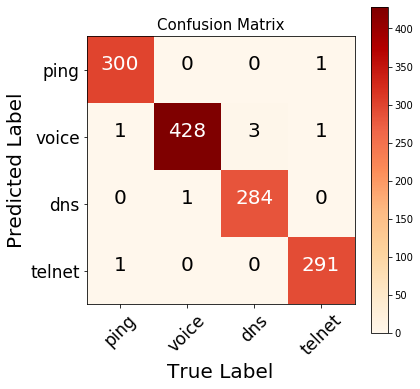

In [20]:
#confusion matrix
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.OrRd)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=17)
plt.yticks(tick_marks, y.unique(), fontsize=17)
plt.xlabel('True Label', fontsize=20)
plt.ylabel('Predicted Label', fontsize=20)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=20)

In [21]:
#model - Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
model.score(X_train,y_train)

0.9997456118036123

In [23]:
predictions = model.predict(X_test)
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.tail()

,true,predicted
1810,voice,voice
3916,dns,dns
2573,voice,voice
318,ping,ping
1630,ping,ping


In [24]:
print('Accuracy: %.4f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 99.6949%


In [25]:
print(pickle.format_version)

4.0


In [26]:
pickle.dump(model,open('Decision_Tree','wb'))

In [27]:
cmDF = pd.DataFrame()

for i, row in enumerate(y.cat.categories):
    temp = {}
    for j, col in enumerate(y.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

        dns  ping  telnet  voice
dns     300     0       0      1
ping      1   428       3      1
telnet    0     1     284      0
voice     1     0       0    291


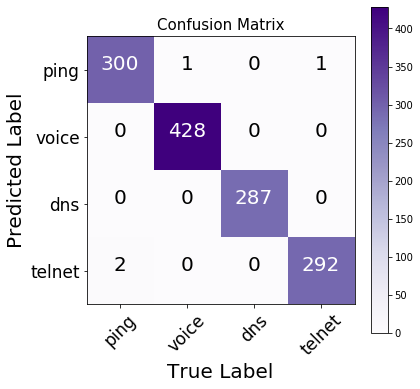

In [28]:
#confusion matrix
cm = confusion_matrix(predictions,y_test, labels=y.cat.categories)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=17)
plt.yticks(tick_marks, y.unique(), fontsize=17)
plt.xlabel('True Label', fontsize=20)
plt.ylabel('Predicted Label', fontsize=20)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=20)

In [29]:
tree.export_graphviz(model, out_file='dtree-flow.dot',feature_names=['Delta Forward Packets','Delta Forward Bytes',
 'Forward Instantaneous Packets per Second',
 'Forward Average Packets per second',
 'Forward Instantaneous Bytes per Second',
 'Forward Average Bytes per second' ,'Delta Reverse Packets',
 'Delta Reverse Bytes' ,'DeltaReverse Instantaneous Packets per Second',
 'Reverse Average Packets per second',
 'Reverse Instantaneous Bytes per Second',
 'Reverse Average Bytes per second'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)

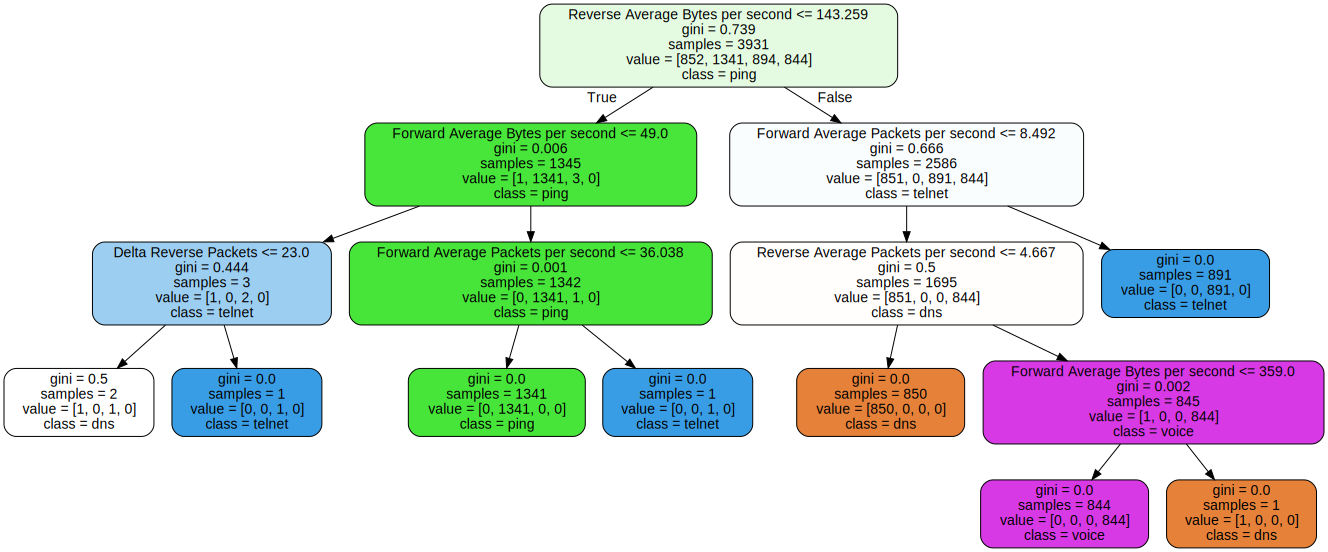

In [30]:
with open("dtree-flow.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [31]:
#Unsupervised Learning
#K-means

X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']
model = KMeans(n_clusters=len(y.cat.categories))
clusters = model.fit_predict(X)
model.cluster_centers_.shape

(4, 12)

In [32]:
y_codes =  np.asarray(y.cat.codes)

In [33]:
y_codes.tolist().count(0) #DNS

1154

In [34]:
y_codes.tolist().count(1) #Ping

1770

In [35]:
y_codes.tolist().count(2) #Telnet

1181

In [36]:
y_codes.tolist().count(3) #Voice

1137

In [37]:
strlabels = ['']*len(y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'dns'
    elif clusters[i]==1: strlabels[i] = 'ping'
    elif clusters[i]==2: strlabels[i] = 'telnet'
    elif clusters[i]==3: strlabels[i] = 'voice'
accuracy_score(y, strlabels)*100.0

34.280808851583366

In [38]:
X = PCA(2).fit_transform(X)
labels = np.zeros_like(clusters) 

for i in range(len(y.cat.categories)):
    mask = (clusters == i)
    labels[mask] = stats.mode(y_codes[mask])[0]
print (labels)

[1 1 1 ... 1 1 1]


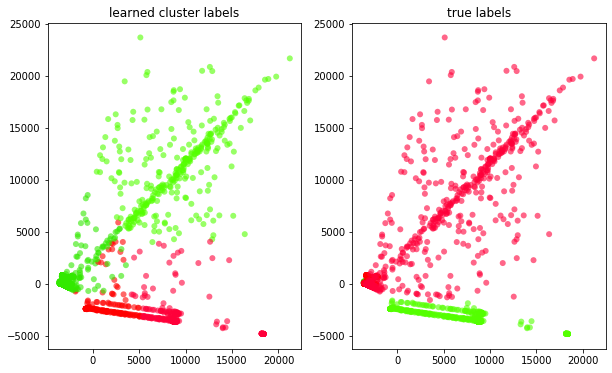

In [39]:
kwargs = dict(cmap = plt.cm.get_cmap('prism', 4),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].scatter(X[:, 0], X[:, 1], c=clusters, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=y_codes, **kwargs)
ax[1].set_title('true labels');

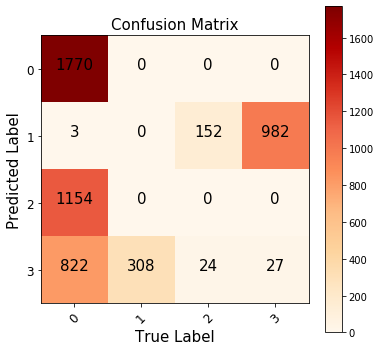

In [40]:
cm=confusion_matrix(y, strlabels, labels=['ping','voice','dns','telnet'])
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.OrRd)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, rotation=45, fontsize=12)
plt.yticks(tick_marks,  fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'black'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

In [41]:
pickle.dump(model,open('KMeans_Clustering','wb'))